# Ajuste de curvas

* Regressão não-linear

## Exemplo: Crescimento exponencial

A população brasileira tem crescido constantemente nas últimas décadas, apresentando um alto crescimento vegetativo.
Embora a taxa de natalidade tenha apresentado diminuição nos últimos anos, o aumento da espectativa de vida e a diminuição da taxa de mortalidade tem contribuído com o aumento populacional.

Observe os dados da população brasileira nas últimas décadas:

| Ano | População |
| --- | --- |
| 1872 | 9.930.478 |
| 1890 | 14.333.915 |		
| 1900 | 17.438.434 |		
| 1920 | 30.635.605	|	
| 1940 | 41.236.315	|	
| 1950 | 51.944.397	|	
| 1960 | 70.992.343	|	
| 1970 | 94.508.583	|	
| 1980 | 121.150.573 |		
| 1991 | 146.917.459 |		
| 2000 | 169.590.693 |		
| 2010 | 190.755.799 |

1. Trace o diagrama de dispersão dos dados acima
2. Em seguida, plote novamente utilizando o eixo semi-log.
3. Ajuste os dados a uma curva exponencial
4. Sabendo que a população brasileira em 2020 foi de 212,6 milhões de habitantes, podemos afirmar que o crescimento continua obedecendo uma curva exponencial?

Text(0, 0.5, 'População')

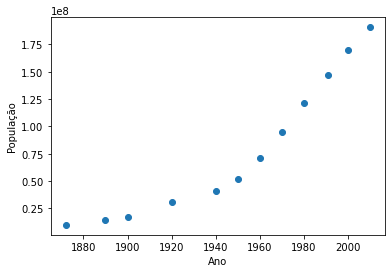

In [9]:
import matplotlib.pyplot as plt
import numpy as np

ano = np.array([1872,1890,1900,1920,1940,1950,1960,1970,1980,1991,2000,2010])
populacao = np.array([9930478,14333915,17438434,30635605,41236315,51944397,70992343,94508583,121150573,146917459,169590693,190755799])

X = ano
Y = populacao

# 1. Trace o diagrama de dispersão dos dados acima
plt.scatter(X, Y)
plt.xlabel('Ano')
plt.ylabel('População')

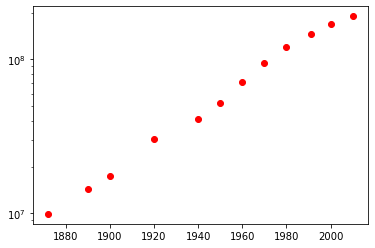

In [2]:
# 2. Em seguida, plote novamente utilizando o eixo semi-log.
plt.figure()
plt.semilogy(X, Y, 'or')

In [8]:
# 3. Ajuste os dados a uma curva exponencial
from scipy import stats

LNY = np.log(Y)
r = stats.linregress(X, LNY)
th1,th0 = r.slope, r.intercept

# o valor obtido foi de th1 = ln(alpha). Para achar o valor de alpha fazemos:
alpha = np.exp(th0)
beta = th1
print(f'A equação obtida foi: y = {alpha:.3e} exp({beta:.4f}x)')
estimativa = alpha*np.exp(2020*beta)
print(f'A estimativa para a população em 2020 é de {estimativa:.0f} habitantes')

# 4. Sabendo que a população brasileira em 2020 foi de 212,6 milhões de habitantes, podemos afirmar que o crescimento continua obedecendo uma curva exponencial?

A equação obtida foi: y = 6.183e-12 exp(0.0224x)
A estimativa para a população em 2020 é de 267592629 habitantes


# Regressão não-linear

Em muitos casos, não é possível linearizar o modelo que desejamos ajustar. 
Nestes casos é preciso utilizar outra técnica diferente do método dos mínimos quadrados, como por exemplo técnicas baseados em otimização.

Observe que no exemplo anterior, a curva exponencial já começa a apresentar uma saturação, indicando que ela está diminuindo de velocidade.

Este dado reflete o fato que na natureza as populações podem crescer exponencialmente por alguns períodos, mas elas estão limitadas pela disponibilidade de recursos.

Este comportamento pode ser descrito pela equação não-linear conhecida como crescimento logístico.
No crescimento logístico, a taxa de crescimento populacional se torna menor à medida que o tamanho da população se aproxima de um máximo imposto por recursos limitantes no ambiente, conhecido como capacidade de suporte ($K$) e pode ser descrito pela equação abaixo:

\begin{equation}
N(t) = \dfrac{N_0 \cdot K}{K - N_0 e^{-rt} + N_0}
\end{equation}

onde $N_0$ é a população no instante $t= 0$, $r$ a taxa de crescimento.

Esta equação vem da solução da equação diferencial:

\begin{equation}
\dfrac{dN}{dt} = r \left(\dfrac{K - N}{K}\right)N
\end{equation}

![crescimentologistico](figuras/ajuste-curvas-fig02.png)

Saiba mais em:

https://pt.khanacademy.org/science/biology/ecology/population-growth-and-regulation/a/exponential-logistic-growth

Entretanto, não é possível linearizar este modelo e devemos utilizar métodos de linearização não-lineares.

No python, as funções `curve_fit` e `minimize` da biblioteca `scipy` são capazes de realizar a regressão não-linear.

A partir do modelo de crescimento logístico com estimativa inicial $N_0 = 8.000.000$, $K = 350.000.000$ e $r = 0,02$, faça:

* A regressão não-linear utilizando a função `curve_fit`
* A regressão não-linear utilizando a função `minimize`
* Plote o gráfico do modelo com a estimativa inicial
* Plote o gráfico do modelo com os valores obtidos pela função `curve_fit` e `minimize`
* Estime a população em 2020.

In [10]:
# Regressão não-lnear utilizando a função `curve_fit`

from scipy.optimize import curve_fit

ano = np.array([1872,1890,1900,1920,1940,1950,1960,1970,1980,1991,2000,2010])
populacao = np.array([9930478,14333915,17438434,30635605,41236315,51944397,70992343,94508583,121150573,146917459,169590693,190755799])

X = ano
Y = populacao

# estimativa inicial
x0 = [8000000, 350000000, 0.02]

def crescimentologistico(t, N0, k, r):
    return N0*k/((k - N0)*np.exp(-r*t) + N0)

res = curve_fit(crescimentologistico, X-1870, Y, x0)
print(res[0])

[5.77029223e+06 3.39152094e+08 3.10411888e-02]


In [13]:
# A regressão não-linear utilizando a função `minimize`

from scipy.optimize import minimize

def crescimentologistico_somatorio_residuos(theta, t, N):
    N0 = theta[0]
    k = theta[1]
    r = theta[2]
    residuos = N - N0*k/((k - N0)*np.exp(-r*t) + N0)
    return np.sum(residuos**2)

r = minimize(crescimentologistico_somatorio_residuos, x0, args=(X-1870,Y))
print(r.x, '\n')

[6.48767818e+06 3.67784811e+08 2.95410984e-02] 



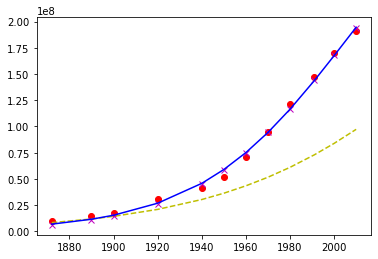

In [21]:
# Plote o gráfico do modelo com a estimativa inicial
# Plote o gráfico do modelo com os valores obtidos pela função `curve_fit` e `minimize`

Yinicial = crescimentologistico(X-1870, x0[0], x0[1], x0[2])
Ycurvefit = crescimentologistico(X-1870, res[0][0], res[0][1], res[0][2])
Yminimize = crescimentologistico(X-1870, r.x[0], r.x[1], r.x[2])
plt.plot(X, Yinicial, 'y--')
plt.plot(X, Ycurvefit, 'mx')
plt.plot(X, Yminimize, 'b')
plt.scatter(X, Y, c='r')

In [27]:
# Estime a população em 2020.
# Compare com o valor obtido no crescimento exponencial e o valor verdadeiro, de 212,6 milhões

estimativa2 = crescimentologistico(2020-1870, res[0][0], res[0][1], res[0][2])
print(f'Estimativa (exponencial)           : {estimativa:.0f} habitantes')
print(f'Estimativa (crescimento logístico) : {estimativa2:.0f} habitantes')

Estimativa (exponencial)           : 267592629 habitantes
Estimativa (crescimento logístico) : 218945632 habitantes


# Exercício

Considere o modelo abaixo:

$
\begin{equation}
y = x(\alpha + \beta x^\phi)^{-1/\theta}
\end{equation}
$

conhecido como modelo de Bleasdale e Nelder, de 1960.
Este modelo pode ser utilizado para modelar curvas relacionadas ao rendimento de uma plantação na agricultura, quantificando a relação entre o rendimento total de uma cultura (y) e a densidade da cultura (x).
Ele tem a capacidade de capturar o caráter de competição entre plantas por recursos, de forma que o rendimento tende a diminuir com o aumento da densidade de plantio.

Considere os dados a seguir:

| Amostra | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| x | 1 | 4 | 8 | 11 | 14 | 18 | 21 | 24 | 28 | 31 | 
| y | 19 | 63 | 58 | 44 | 35 | 23 | 17 | 7 | 6 | 3 |

Determine os parâmetros do modelo de Bleasdale e Nelder que melhor se ajustam aos dados acima.

Utilize os valores iniciais de $\alpha = \beta = \phi = \theta = 1$

In [109]:
# estimativa inicial
x0 = [1, 1, 1, 1]
x = np.array([1,4,8,11,14,18,21,24,28,31])
y = np.array([19,63,58,44,35,23,17,7,6,3])
